### NORMALISATION

#### MIN-MAX SCALING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

use header=None, when there is a row acting as a header

In [ ]:
df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class Label','Alcohol','Malic Acid']

In [ ]:
df.head()

,Class Label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


we can see that the magnitude of values in alcohol is large compared to values in Malic Acid

<Axes: xlabel='Alcohol', ylabel='Density'>

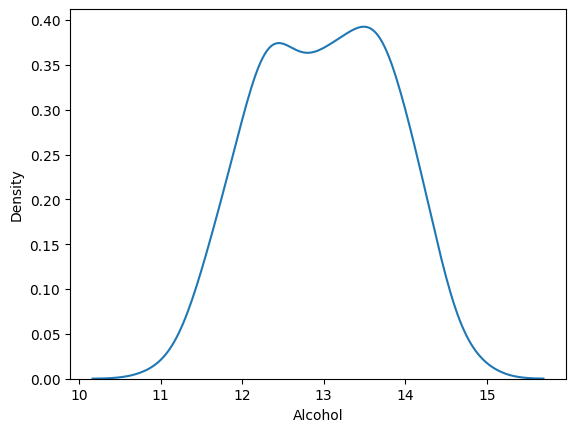

In [ ]:
#pdf
sns.kdeplot(df['Alcohol'])

looks like a normal distribution sort of

<Axes: xlabel='Malic Acid', ylabel='Density'>

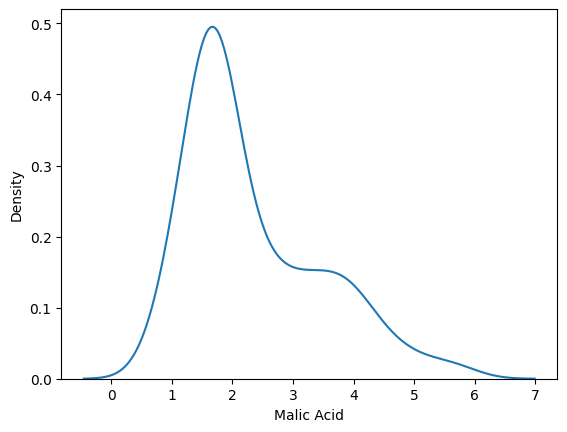

In [ ]:
# pdf
sns.kdeplot(df['Malic Acid'])

<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

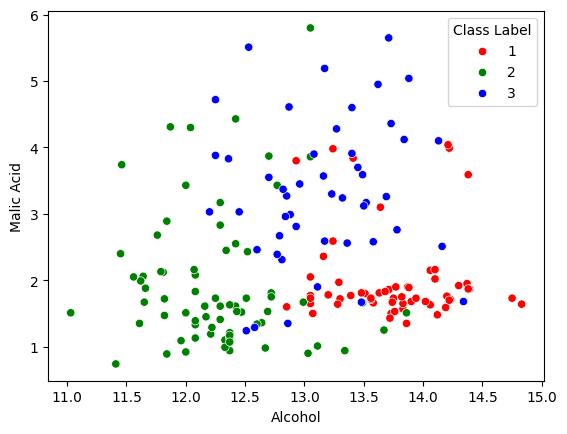

In [ ]:
color_pallete={1:'red',2:'green',3:'blue'}
sns.scatterplot(df,x='Alcohol',y='Malic Acid',hue='Class Label',palette=color_pallete)

In [ ]:
df.shape

(178, 3)

Before any type of scaling -> always do a train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Class Label',axis=1),df['Class Label'],test_size=0.3,random_state=0)

In [ ]:
X_train.shape

(124, 2)

In [ ]:
X_test.shape

(54, 2)

In [ ]:
y_train.shape

(124,)

In [ ]:
y_test.shape

(54,)

In [ ]:
X_train['Alcohol'].min()

11.03

In [ ]:
X_train['Malic Acid'].min()

0.89

Always fit the scaler to the train set, it will learn the parameters.

But transform both the train and test sets.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
scaler.data_min_

array([11.03,  0.89])

In [ ]:
scaler.data_max_

array([14.75,  5.65])

scaler will store min and max values of each column of the original data and use that in the transformation formula of min max scaling to transform both the train and test sets

In [ ]:
# transforming train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train.columns

Index(['Alcohol', 'Malic Acid'], dtype='object')

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [ ]:
X_train_scaled.head(1)

,Alcohol,Malic Acid
0,0.72043,0.203782


In [ ]:
X_test.columns

Index(['Alcohol', 'Malic Acid'], dtype='object')

In [ ]:
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [ ]:
X_test_scaled.head(1)

,Alcohol,Malic Acid
0,0.728495,0.163866


In [ ]:
np.round(X_train.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


in original data we had min=11.0 max=14.8 for alcohol

after transformation

Xi' = (Xi - Xmin)/(Xmax - Xmin)

and replace Xi with Xmin = 11.0

and replace Xi with Xmax = 14.8

so the min value after transformation becomes 0, and max value becomes 1 for the column alcohol



In [ ]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


In [ ]:
y_train.head(1)

,Class Label
22,1


min and max values of both the features are 0 and 1 respectively

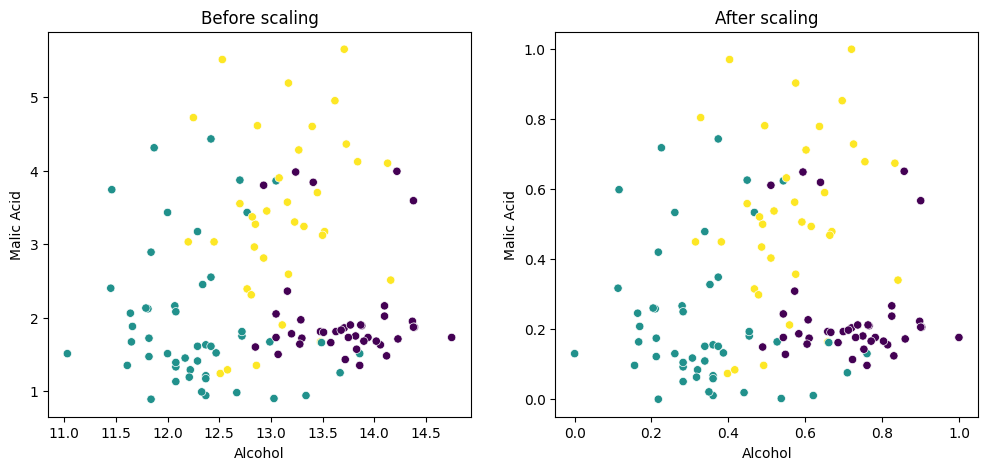

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title('Before scaling')
sns.scatterplot(data=X_train,x='Alcohol',y='Malic Acid',c=y_train,ax=ax1)

ax2.set_title('After scaling')
sns.scatterplot(data=X_train_scaled,x='Alcohol',y='Malic Acid',c=y_train,ax=ax2)
plt.show()

we can see that the entire data is squished between 0 to 1 after scaling

kde plot

In [ ]:
X_train.head(1)

,Alcohol,Malic Acid
22,13.71,1.86


<Axes: title={'center': 'PDF after scaling'}, xlabel='Alcohol', ylabel='Density'>

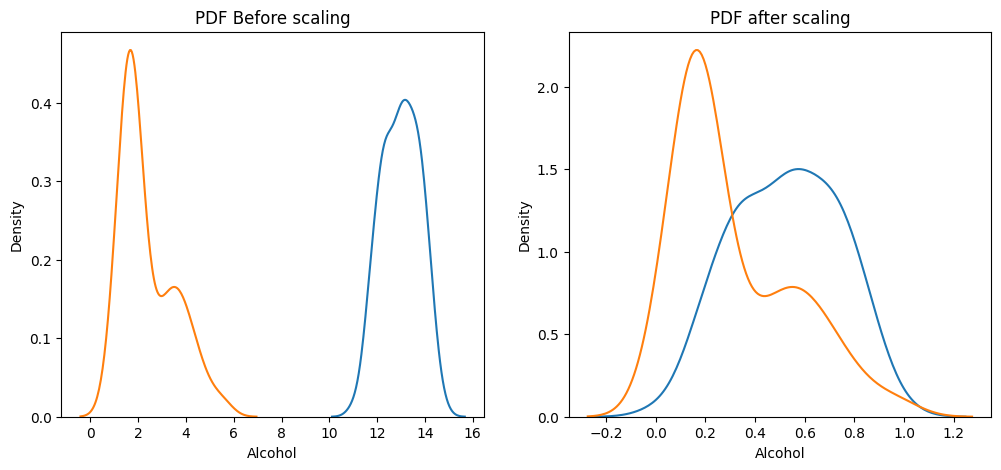

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title('PDF Before scaling')
sns.kdeplot(X_train['Alcohol'],ax=ax1)
sns.kdeplot(X_train['Malic Acid'],ax=ax1)

ax2.set_title('PDF after scaling')
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(X_train_scaled['Malic Acid'],ax=ax2)

before scaling , malic acid was in the range of 0-6 , and alcohol was in the range of 10-16

after scaling, malic acid and alcohol both are in the range of 0 to 1.

since everything is being squished between 0 and 1, the impact of outliers will also be squished inside which is kinda bad, but other than that , everything is great

In [ ]:
df = pd.read_csv('Social_Network_Ads.csv',usecols=[2,3,4])

In [ ]:
df.head(1)

,Age,EstimatedSalary,Purchased
0,19,19000,0


In [ ]:
extra_df = pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]})
new_df = pd.concat([df,extra_df],ignore_index=True)
new_df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


In [ ]:
new_df['Age'].max()

95

Text(0.5, 1.0, 'Outliers in data before scaling')

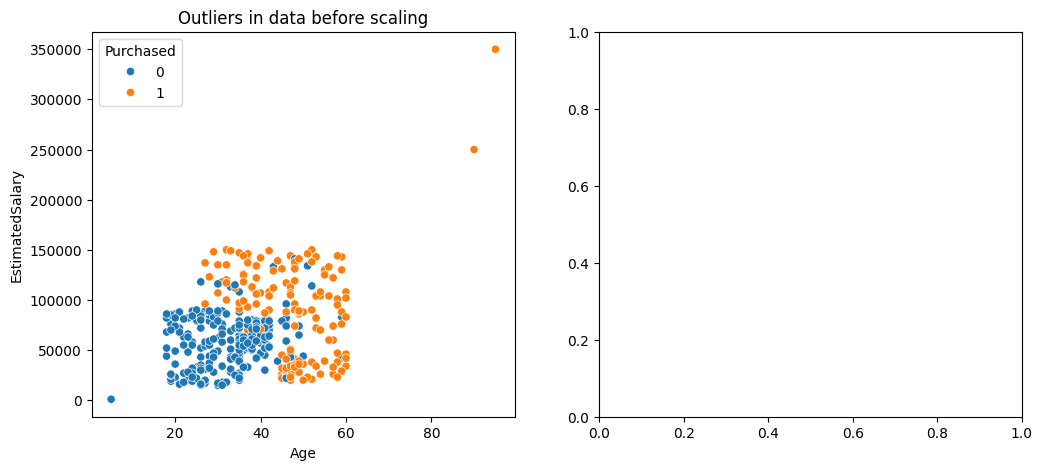

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
sns.scatterplot(data=new_df,x='Age',y='EstimatedSalary',hue='Purchased',ax=ax1)
ax1.set_title('Outliers in data before scaling')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(new_df.drop('Purchased',axis=1),new_df['Purchased'],test_size=0.3,random_state=0)

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
rob_scaler = RobustScaler()

In [ ]:
# fit the training data
rob_scaler.fit(X_train)

RobustScaler()

In [ ]:
# transform train and test data
X_train_scaled = rob_scaler.transform(X_train)
X_test_scaled = rob_scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

Text(0.5, 1.0, 'Outliers in data after Robut Scaling')

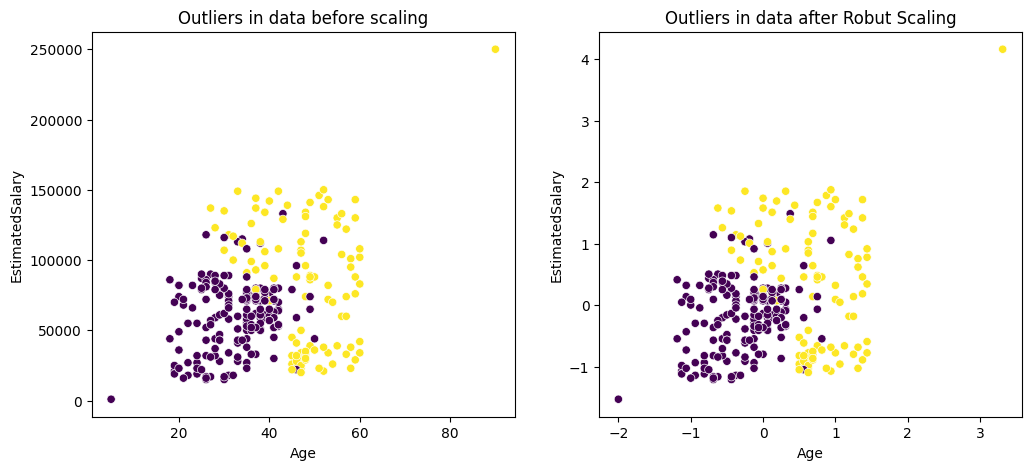

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
sns.scatterplot(data=X_train,x='Age',y='EstimatedSalary',c=y_train,ax=ax1)
ax1.set_title('Outliers in data before scaling')

sns.scatterplot(data=X_train_scaled,x='Age',y='EstimatedSalary',c=y_train,ax=ax2)
ax2.set_title('Outliers in data after Robut Scaling')

While the outliers are still present, they are not compressed into the main cluster unlike MinMax scaler.

fit method -> learns the median and interquartile range of the original distribution and uses it to transform the train and test sets

In [ ]:
np.round(X_train.describe())

,Age,EstimatedSalary
count,282.0,282.0
mean,38.0,69138.0
std,11.0,35358.0
min,5.0,1000.0
25%,30.0,43000.0
50%,37.0,68000.0
75%,46.0,86750.0
max,90.0,250000.0


In [ ]:
np.round(X_train_scaled.describe())

,Age,EstimatedSalary
count,282.0,282.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-0.0,-1.0
50%,0.0,0.0
75%,1.0,0.0
max,3.0,4.0


<Axes: title={'center': 'PDF after scaling'}, xlabel='Age', ylabel='Density'>

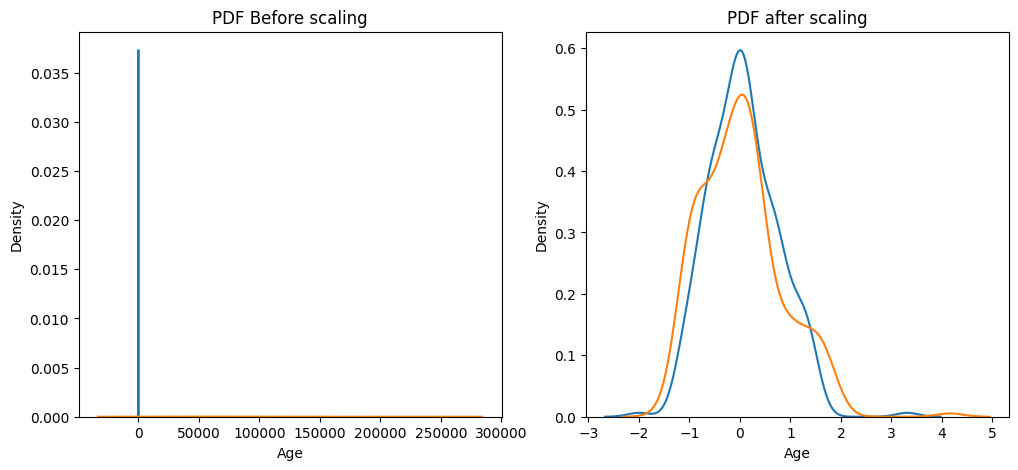

In [ ]:
# kde plot
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title('PDF Before scaling')
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

ax2.set_title('PDF after scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)

In [ ]:
# median
rob_scaler.center_

array([3.7e+01, 6.8e+04])

In [ ]:
# interquartile range
rob_scaler.scale_

array([1.600e+01, 4.375e+04])